In [1]:
 #Transformers installation
! pip install transformers datasets evaluate accelerate
# To install from source instead of the last release, comment the command above and uncomment the following one.
# ! pip install git+https://github.com/huggingface/transformers.git

  Using cached transformers-4.57.1-py3-none-any.whl.metadata (43 kB)
  Using cached datasets-4.4.1-py3-none-any.whl.metadata (19 kB)
  Using cached evaluate-0.4.6-py3-none-any.whl.metadata (9.5 kB)
  Using cached accelerate-1.11.0-py3-none-any.whl.metadata (19 kB)
  Using cached filelock-3.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached huggingface_hub-0.36.0-py3-none-any.whl.metadata (14 kB)
  Using cached regex-2025.11.3-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (40 kB)
  Using cached tokenizers-0.22.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.8 kB)
  Using cached safetensors-0.6.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached pyarrow-22.0.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (3.2 kB)
  Using cached xxhash-3.6.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (13 kB)
  Using cached multiprocess-0.70.18-py31

In [ ]:
from huggingface_hub import login
login(token="replace token here")

In [10]:
from datasets import load_dataset

imdb = load_dataset("imdb")

In [11]:
imdb["test"][0]

{'text': 'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as 

In [12]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")

In [13]:
sentence = imdb["test"][0]["text"]
print(sentence)

I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn't match the background, and painfully one-dimensional characters cannot be overcome with a 'sci-fi' setting. (I'm sure there are those of you out there who think Babylon 5 is good sci-fi TV. It's not. It's clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It's really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it's rubbish as they have to alway

In [14]:
tokens = tokenizer.tokenize(sentence)
print(tokens)


['i', 'love', 'sci', '-', 'fi', 'and', 'am', 'willing', 'to', 'put', 'up', 'with', 'a', 'lot', '.', 'sci', '-', 'fi', 'movies', '/', 'tv', 'are', 'usually', 'under', '##fu', '##nded', ',', 'under', '-', 'appreciated', 'and', 'misunderstood', '.', 'i', 'tried', 'to', 'like', 'this', ',', 'i', 'really', 'did', ',', 'but', 'it', 'is', 'to', 'good', 'tv', 'sci', '-', 'fi', 'as', 'babylon', '5', 'is', 'to', 'star', 'trek', '(', 'the', 'original', ')', '.', 'silly', 'pro', '##st', '##hetic', '##s', ',', 'cheap', 'cardboard', 'sets', ',', 'stil', '##ted', 'dialogues', ',', 'c', '##g', 'that', 'doesn', "'", 't', 'match', 'the', 'background', ',', 'and', 'painfully', 'one', '-', 'dimensional', 'characters', 'cannot', 'be', 'overcome', 'with', 'a', "'", 'sci', '-', 'fi', "'", 'setting', '.', '(', 'i', "'", 'm', 'sure', 'there', 'are', 'those', 'of', 'you', 'out', 'there', 'who', 'think', 'babylon', '5', 'is', 'good', 'sci', '-', 'fi', 'tv', '.', 'it', "'", 's', 'not', '.', 'it', "'", 's', 'cl', 

In [15]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [16]:
tokenized_imdb = imdb.map(preprocess_function, batched=True)

In [17]:
# Step 1: Install dependencies (uncomment if not installed)
!pip install datasets gensim matplotlib scikit-learn nltk

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached gensim-4.4.0-cp311-cp311-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (8.4 kB)
  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached smart_open-7.5.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-2.0.1-cp311-cp311-manylinux1_x86_64.manylinux_2_28_x86_64.manylinux_2_5_x86_64.whl.metadata (9.0 kB)
Using cached gensim-4.4.0-cp311-cp311-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (27.8 MB)
Using cached nltk-3.9.2-py3-none-any.whl (1.5 MB)
Using cached smart_open-7.5.0-py3-none-any.whl (63 kB)
Using cached wrapt-2.0.1-cp311-cp311-manylinux1_x86_64.manylinux_2_28_x86_64.manylinux_2_5_x86_64.whl (114 kB)


In [18]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
# Step 3: Basic preprocessing
import nltk
from nltk.tokenize import word_tokenize
import string

nltk.download("punkt")

def preprocess(text):
    # lowercase, remove punctuation, tokenize
    text = text.lower().translate(str.maketrans("", "", string.punctuation))
    return word_tokenize(text)

# Use a small subset for faster demo (you can remove [:2000] for full dataset)
sentences = [preprocess(t) for t in imdb["train"]["text"]]



[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
# Step 4: Train a Word2Vec model
from gensim.models import Word2Vec

w2v_model = Word2Vec(
    sentences=sentences,
    vector_size=100,   # embedding dimension
    window=5,          # context window
    min_count=5,       # ignore rare words
    workers=4,
    sg=1               # skip-gram (better for semantic capture)
)

# Save model if you want
w2v_model.save("imdb_word2vec.model")



In [21]:
# Step 5: Check some similar words
print("\nMost similar words to 'movie':")
print(w2v_model.wv.most_similar("movie", topn=10))



Most similar words to 'movie':
[('film', 0.9102790355682373), ('movieit', 0.8177865743637085), ('filmit', 0.8136992454528809), ('movieand', 0.8028020858764648), ('filmi', 0.792953372001648), ('moviebut', 0.7741381525993347), ('moviebr', 0.7563818693161011), ('movieits', 0.7469075322151184), ('moviei', 0.7467926144599915), ('it', 0.7458349466323853)]


/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 158 (\x9e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.pri

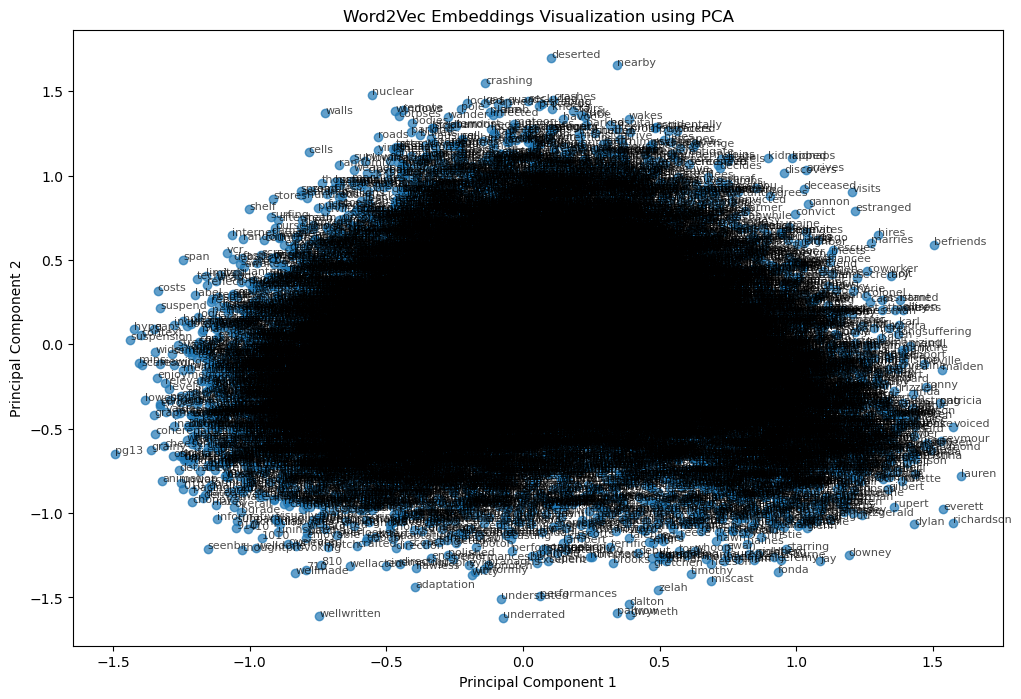

In [22]:
# Step 6: Visualize embeddings using PCA 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random

# Pick a sample of words to visualize
words = list(w2v_model.wv.key_to_index.keys())
# sample_words = random.sample(words, 100)  # optional sampling

# Extract embeddings for selected words
X = w2v_model.wv[words]   # change to sample_words for subset

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Step 7: Plot and annotate words
plt.figure(figsize=(12, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.7)

for i, word in enumerate(words):
    plt.annotate(word, xy=(X_2d[i, 0], X_2d[i, 1]), fontsize=8, alpha=0.7)

plt.title("Word2Vec Embeddings Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


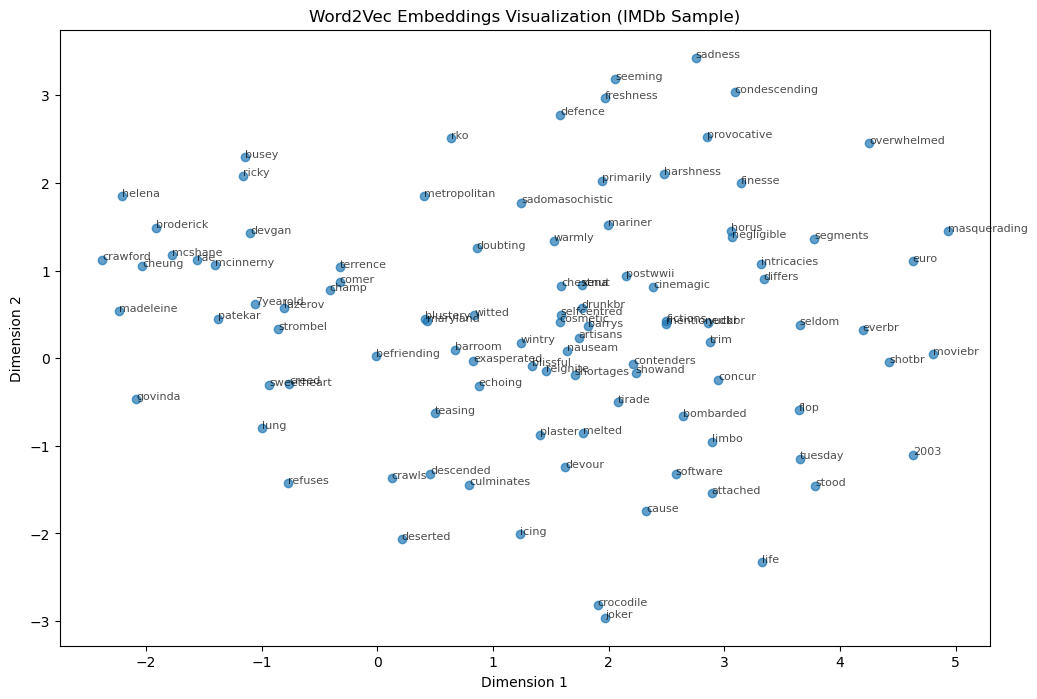

In [23]:
# Step 6: Visualize embeddings using t-SNE
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import random

# Pick a random sample of words to visualize
words = list(w2v_model.wv.key_to_index.keys())
sample_words = random.sample(words, 100)

# Extract their embeddings
X = w2v_model.wv[sample_words]

# Reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

# Step 7: Plot and annotate words
plt.figure(figsize=(12, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.7)

for i, word in enumerate(sample_words):
    plt.annotate(word, xy=(X_2d[i, 0], X_2d[i, 1]), fontsize=8, alpha=0.7)

plt.title("Word2Vec Embeddings Visualization (IMDb Sample)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [24]:
#Train a Word2Vec model
from gensim.models import Word2Vec

w2v_model = Word2Vec(
    sentences=sentences,
    vector_size=100,   # embedding dimension
    window=5,          # context window
    min_count=5,       # ignore rare words
    workers=4,
    sg=0               # cbow
)

# Save model if you want
w2v_model.save("imdb_word2vec.model")
print(w2v_model)

Word2Vec<vocab=32067, vector_size=100, alpha=0.025>


In [25]:
print((w2v_model.wv['good']))

[ 1.1817636  -0.64626205 -1.1667557   0.12792264  0.25845468 -1.2144581
 -1.2494177  -2.2910397   1.8267671  -0.30040565  0.7769041   2.584636
  0.95814484  1.9862616   2.825511    1.0805798  -1.4038612   2.1536193
 -0.6976937  -1.0653366   2.0618207   0.5735062   0.61995625 -3.054578
  0.26447394 -2.6510289   1.7977562   3.6433632   1.5045282  -1.3308969
 -0.64631253  1.7639784  -2.4559512  -1.522527   -2.1373925   0.3804874
 -1.013761    0.627572   -1.0399443  -1.4783703  -2.5126183   0.4804762
  1.1910348   0.2291884   2.068876   -1.2052077   3.5727136  -0.9410783
 -2.3908684   0.5842785  -1.9045227  -2.4611702  -1.6868612   0.03606402
 -0.14964896 -3.9420235  -0.04347177 -0.07115734 -1.0989659  -1.0709012
 -1.302199    2.2201157   1.4900516   0.8246496  -1.6910441  -2.4520757
  0.13824594 -1.4908019  -0.04984364  0.5671302  -0.42796937  2.2816052
  1.6145335   1.2604986   0.8252414  -1.8386893  -2.7106044  -1.5166799
 -1.6632075  -0.6617221  -0.26132423  1.1003823  -0.5485243   0.2

In [26]:
# Check some similar words
print("\nMost similar words to 'movie':")
print(w2v_model.wv.most_similar("movie", topn=10))


Most similar words to 'movie':
[('film', 0.9320356845855713), ('moviebr', 0.75039142370224), ('flick', 0.7239258289337158), ('show', 0.6764881014823914), ('filmbr', 0.673173189163208), ('documentary', 0.6731485724449158), ('it', 0.6492897272109985), ('picture', 0.6383265256881714), ('sequel', 0.637229859828949), ('movies', 0.5865203738212585)]
